In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

In [13]:
data = pd.read_csv("Stocks2.csv")
df = data.iloc[-100:, :]

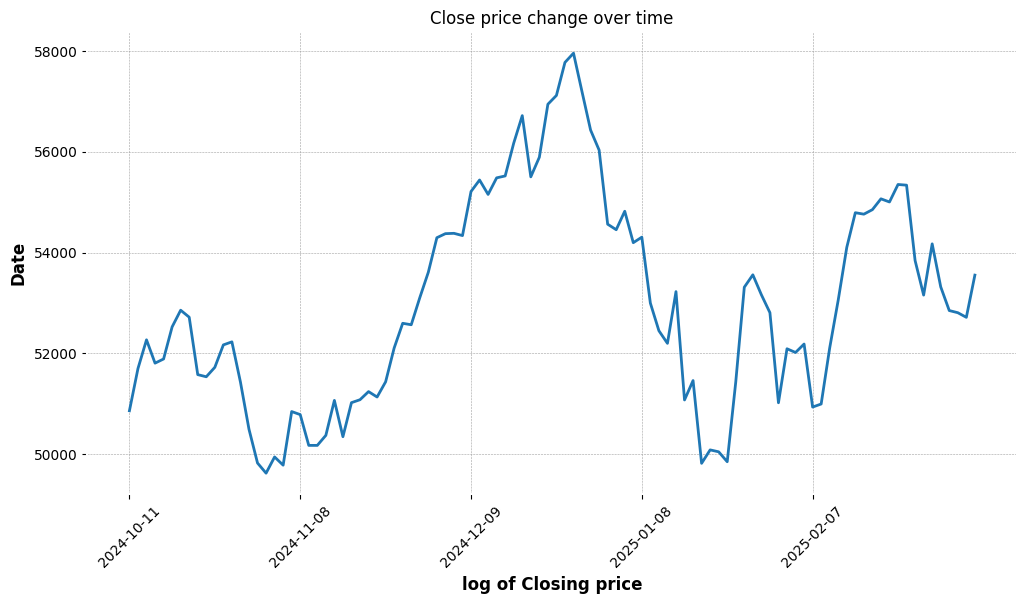

In [25]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(df['date'], df['adj_close'])
plt.xticks(df['date'][::20], rotation=45) 
plt.xlabel("log of Closing price")
plt.ylabel("Date")
# plt.yscale("log")
plt.show()

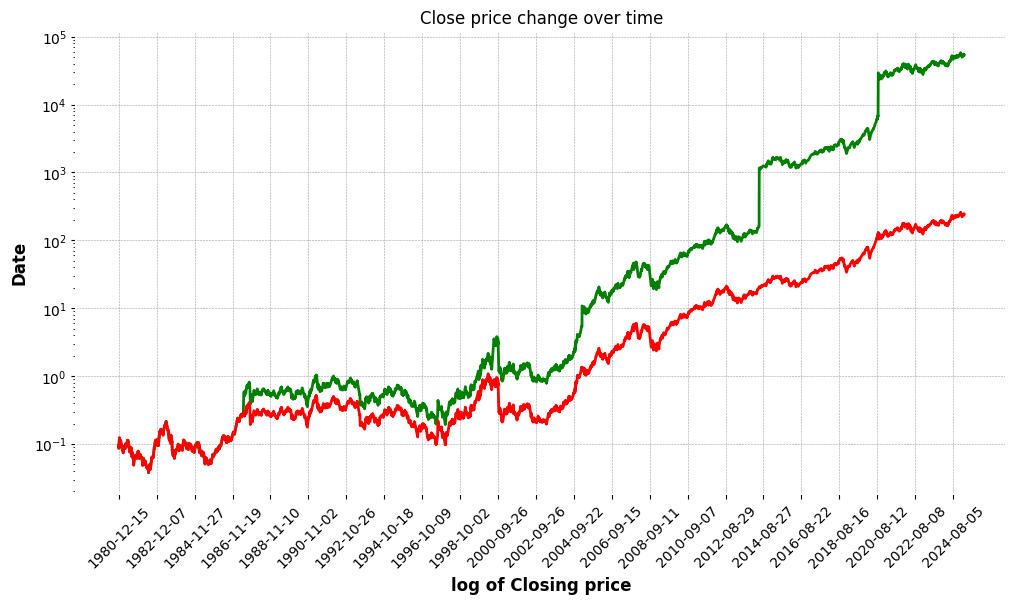

In [28]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(data['date'], data['adj_close'], color = 'green')
plt.plot(data['date'], data['close'], color = 'red')
plt.xticks(data.index[::500], rotation=45) 
plt.xlabel("log of Closing price")
plt.ylabel("Date")
plt.yscale("log")
plt.show()

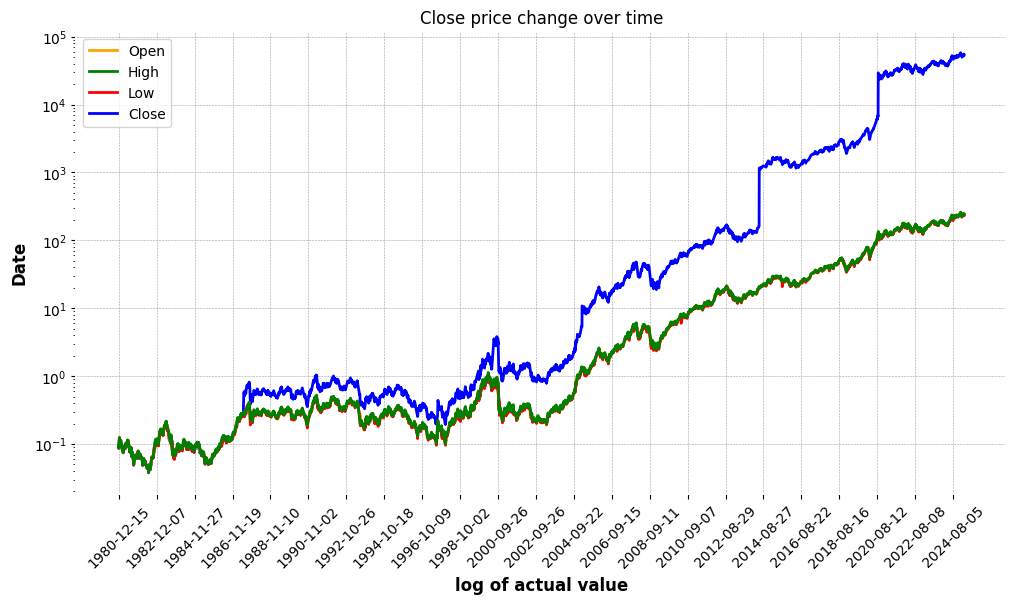

In [30]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(data['date'], data['adj_close'], color = 'blue')
plt.plot(data['date'], data['open'], color = 'orange')
plt.plot(data['date'], data['low'], color = 'red')
plt.plot(data['date'], data['high'], color = 'green')
plt.xticks(data.index[::500], rotation=45) 
plt.xlabel("log of actual value")
plt.ylabel("Date")
plt.yscale("log")
ohlc_legend = [
    plt.Line2D([0], [0], color='orange', label='Open'),
    plt.Line2D([0], [0], color='green', label='High'),
    plt.Line2D([0], [0], color='red', label='Low'),
    plt.Line2D([0], [0], color='blue', label='Close')
]
plt.legend(handles = ohlc_legend)
plt.show()

In [6]:
mp = df.set_index('date')
mp['close'] = mp['adj_close']
mp.index = mp.index.astype("datetime64[ns]")

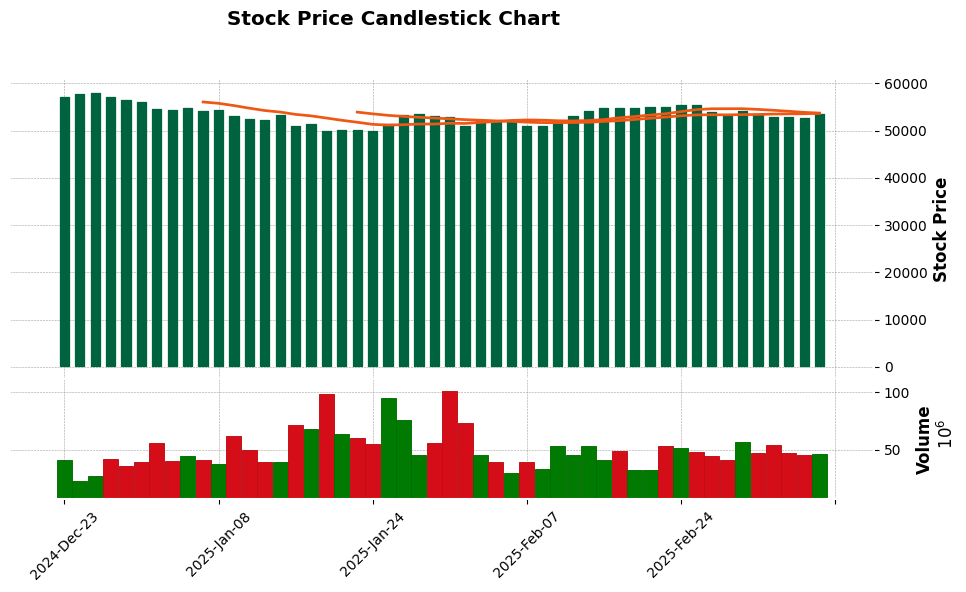

In [32]:
mpl.plot(mp.iloc[-50:,:],
         type="candle", 
         style="charles",  # Styles: classic, charles, yahoo, etc.
         title="Stock Price Candlestick Chart",
         ylabel="Stock Price",
         ylabel_lower="Volume",
         volume=True, 
         figsize=(12, 6), 
         mav=(10, 20),  # Moving averages (10-day & 20-day)
         show_nontrading=False)

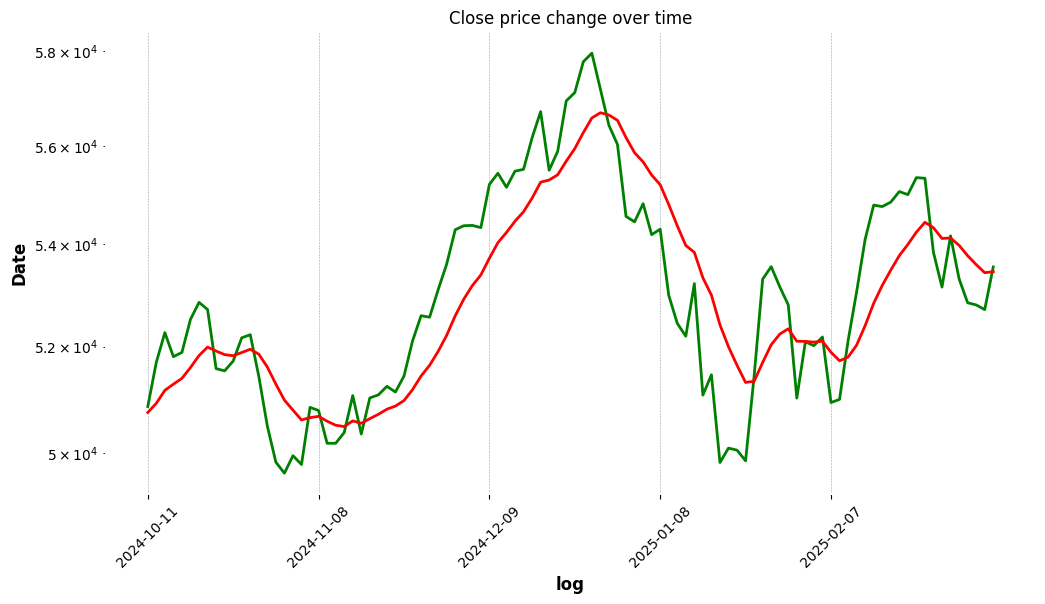

In [34]:
plt.figure(figsize=(12, 6))
plt.title("Close price change over time")
plt.plot(df['date'], df['adj_close'], color = 'green')
plt.plot(df['date'], df['rolling_ma'], color = 'red')
plt.xticks(df['date'][::20], rotation=45) 
plt.xlabel("log")
plt.ylabel("Date")
plt.yscale("log")
plt.show()